# Appendix E Sampling Distribution 

## E.1 Sampling from the true population

Most properties in statistics describe the behaviour of a procedure under repeated sampling from the true population. The problem is, in the real world, the true population is unknown. In a synthetic environment (e.g., simulation in Appendix D), we do know the true population as well as the sampling scheme. 

In [18]:
set.seed(1)
n=50;
x=rnorm(n,mean=10,sd=2);
beta.true=c(20,0.15)
Ey=x*beta.true[2]+beta.true[1];

error.terms<- (runif(n)-0.5)*5;
y=Ey+error.terms;

beta.hat<-lm(y~x+1)$coef;


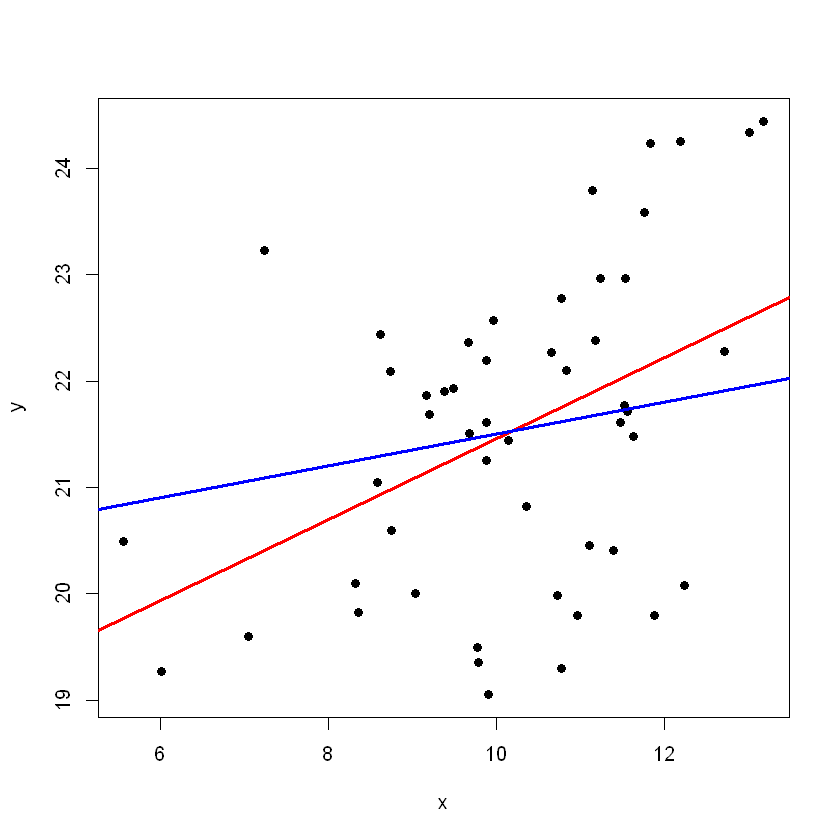

In [19]:
plot(y~x,pch=16,cex=1)
abline(b=beta.hat[2],a=beta.hat[1],lwd=3,col='red')
abline(b=beta.true[2],a=beta.true[1],lwd=3,col='blue')


In [29]:
# To study the sampling distribution of the estimator of the regression slope
simulate.one.instance<-function(x,beta.true){
    n=length(x);
    Ey=x*beta.true[2]+beta.true[1];
    error.terms<- (runif(n)-0.5)*5;
    y=Ey+error.terms;
    beta.hat<-lm(y~x+1)$coef;
    return(beta.hat[2])
    
}


x 
0.3806585

In [30]:
set.seed(1)
n=50;
x=rnorm(n,mean=10,sd=2);
beta.true=c(20,0.15)

N.sim=1e4; # 10000
beta.sim<-replicate(N.sim,simulate.one.instance(x=x,beta.true=beta.true))

[1] 0.001874243

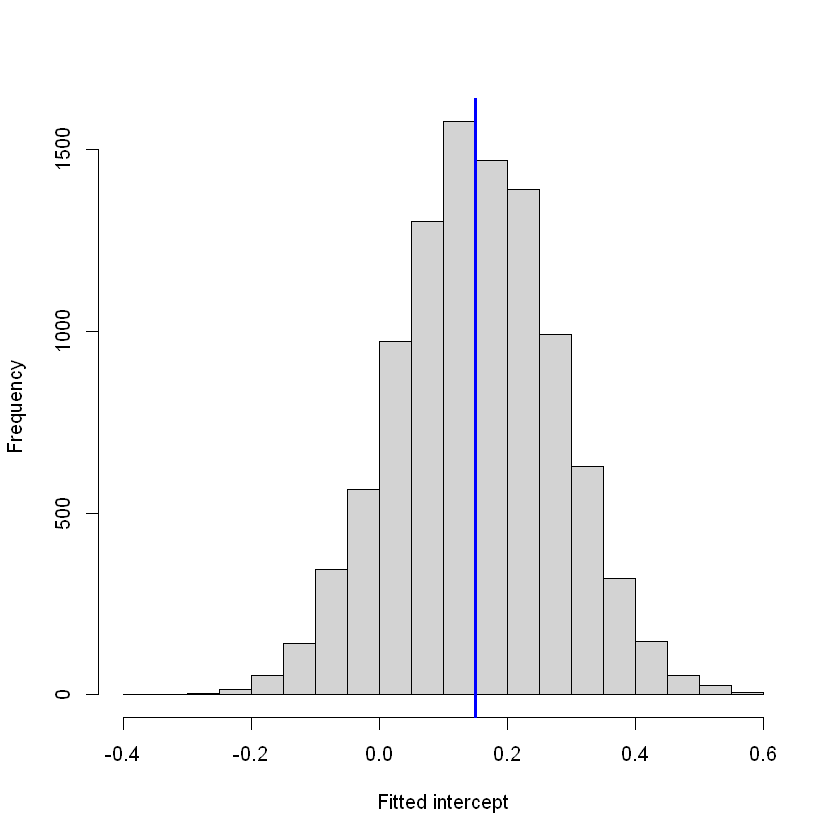

In [38]:
hist(beta.sim,xlab='Fitted intercept', main='') # geom_histogram
abline(v=beta.true[2],lwd=3,col='blue')
mean(beta.sim)-beta.true[2]